In [18]:
# import libraries 
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

(50000, 32, 32, 3)


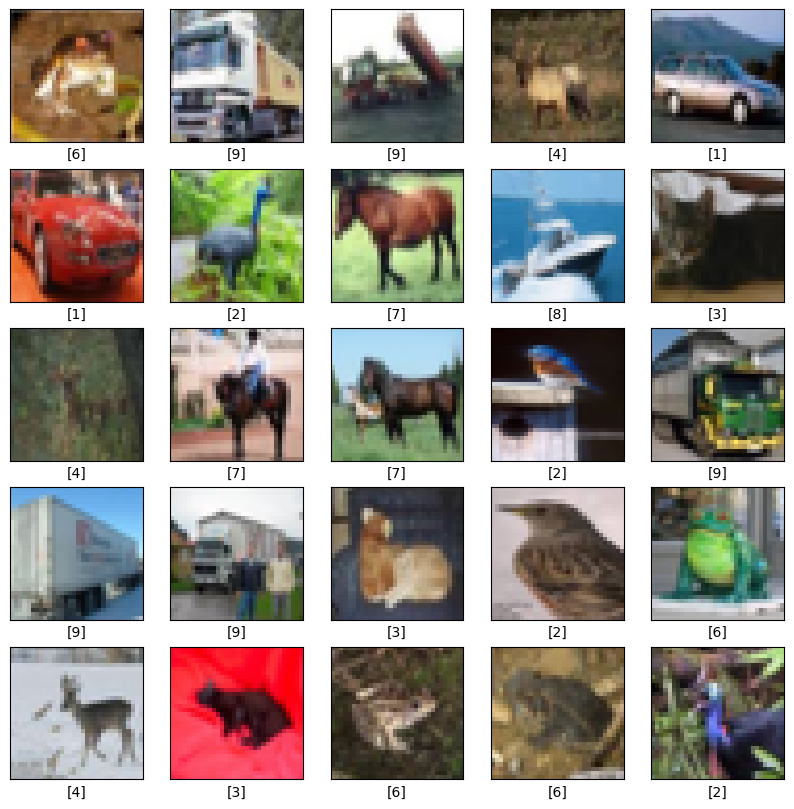

In [20]:
# load  CIFAR-10 and split into train and test
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print(train_images.shape)

# show the first 25 images in the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()



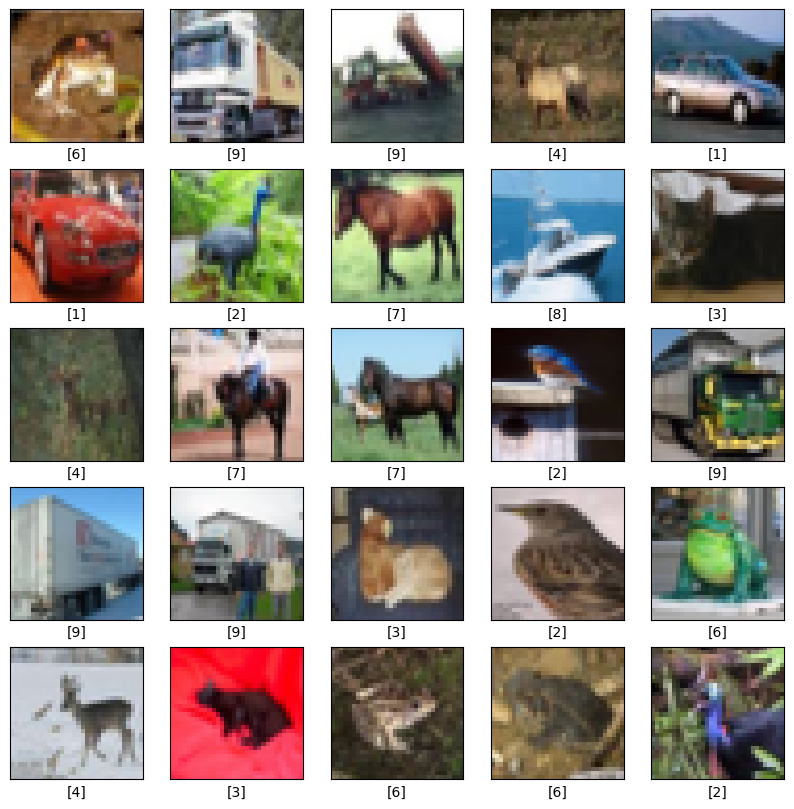

In [21]:
# normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# show the first 25 images in the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

In [27]:
# build the CNN model
model = models.Sequential()

# add the first convolutional layer
# ayers.Conv2D(filters, kernel_size, activation='relu', input_shape)
# filters: the number of nodes in the layer, the number of filters to use
# kernel_size: the size of the filter matrix for our convolution
# activation: the activation function to use
# input_shape: the shape of the input data

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# add the max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add the max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add the flatten layer
model.add(layers.Flatten())

# add the dense layer
model.add(layers.Dense(128, activation='relu'))

# add the output layer
model.add(layers.Dense(10, activation='softmax'))

# show output layer
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

In [28]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# train the model
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5035 - accuracy: 0.4483 - val_loss: 1.2113 - val_accuracy: 0.5633
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1395 - accuracy: 0.5968 - val_loss: 1.0899 - val_accuracy: 0.6050
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9903 - accuracy: 0.6514 - val_loss: 0.9632 - val_accuracy: 0.6609
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8823 - accuracy: 0.6898 - val_loss: 0.9108 - val_accuracy: 0.6840
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8059 - accuracy: 0.7180 - val_loss: 0.9113 - val_accuracy: 0.6791
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7420 - accuracy: 0.7376 - val_loss: 0.8685 - val_accuracy: 0.7053
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6828 - accuracy: 0.7597 - val_loss: 0.8507 - val_ac

In [30]:
# evaluate the model
# model.evaluate() returns the loss value and metrics values for the model in test mode (verbose=0)
# verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar. 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8832 - accuracy: 0.7188

Test accuracy: 0.7188000082969666


In [32]:
import numpy as np

1/1 [==============================] - 0s 12ms/step
predict [3 8 8 0 4]
actual [[3]
 [8]
 [8]
 [0]
 [6]]


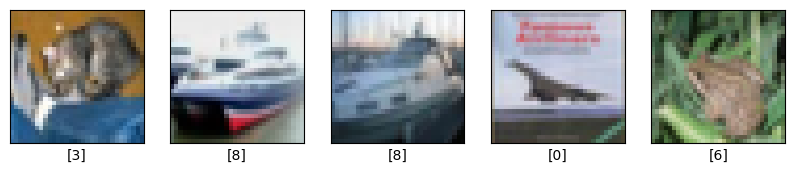

In [38]:
predictions = model.predict(test_images[:5])

#  print the predictions and the actual labels for the first 5 images in the test dataset
print("predict", np.argmax(predictions, axis=1))
print("actual", test_labels[:5])

# show the first 5 images in the test dataset
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(test_labels[i])
plt.show()



predict cat
actual cat


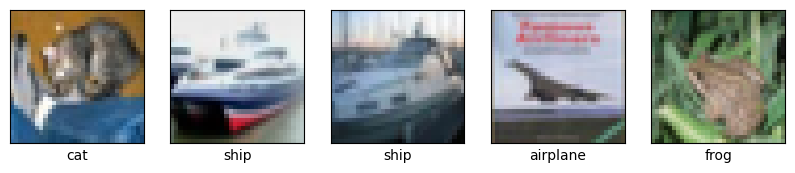

In [39]:
#  name the classes for the CIFAR-10 dataset 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

#  print the predictions and the actual labels for the first 5 images in the test dataset
print("predict", class_names[np.argmax(predictions[0])])
print("actual", class_names[test_labels[0][0]])

# show the first 5 images in the test dataset
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(class_names[test_labels[i][0]]+ " " + class_names[np.argmax(predictions[i])] )
plt.show()